#### Create some random data points and fit them with a line !!

Create a function that will create data points with a line 

All the imports should be at the top whenever you import something - move it to the top after you work on it !!

In [1]:
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(123)

def line(x, pars, err=False):#default for error
    '''
    creates points in a line
    Arguments :
    x : array of independent variable values
    pars: series(containing values for a,b for ax+b)
    returns/output:
    array of y values
    '''
    if err:
        err = np.random.randn(len(x)) * err #changes STD.DEV but not mean !!
    #lets add some noise/errors - to make up for the fluctuations that you might encounter later
    #add the error to the equation to make up for it !!
    else:
        err = np.zeros_like(x) #rethink this if it is a large dataset
    return(pars[0] * x + pars[1]) + err, err

In [3]:
'''
par1 = (0.5,2)
x = np.linspace(-10,10,100)
y = line(x,par1)
pl.plot(x,y,'o') #these are datapoints - so always plot them as such
'''

"\npar1 = (0.5,2)\nx = np.linspace(-10,10,100)\ny = line(x,par1)\npl.plot(x,y,'o') #these are datapoints - so always plot them as such\n"

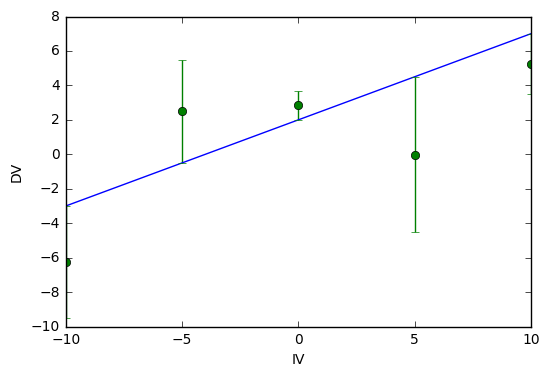

In [4]:
#model 
par1 = (0.5,2)
x_model = np.linspace(-10,10,100)
y_model, e_model = line(x_model,par1)
pl.plot(x_model,y_model,'-')

#data
x = np.linspace(-10,10,5)
y, e = line(x,par1, err=3)
pl.errorbar(x,y,yerr=e, fmt='o')
pl.xlabel('IV')
pl.ylabel('DV')

In [5]:
import statsmodels.api as sm
#it is the easier but the riskier one !!

In [6]:
print (x)
print (sm.add_constant(x))

[-10.  -5.   0.   5.  10.]
[[  1. -10.]
 [  1.  -5.]
 [  1.   0.]
 [  1.   5.]
 [  1.  10.]]


In [57]:
lres = sm.OLS(y, x).fit() 
#this is not an array - this doesn't seem right !!
#an object got created here
lres.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4.320
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.106
Time:                        11:22:41   Log-Likelihood:                -12.232
No. Observations:                   5   AIC:                             26.46
Df Residuals:                       4   BIC:                             26.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4106      0.198      2.078      0.106        -0.138     0.959
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.110
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.516
Skew:                           0.051   Prob(JB):                        0.773
Kurtosis:                       1.430   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
lres.predict(x)

array([-4.10625233, -2.05312616,  0.        ,  2.05312616,  4.10625233])

In [60]:
lres = sm.OLS(y, sm.add_constant(x)).fit()
lres.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3.584
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.155
Time:                        11:23:06   Log-Likelihood:                -11.980
No. Observations:                   5   AIC:                             27.96
Df Residuals:                       3   BIC:                             27.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8659      1.534      0.565      0.612        -4.015     5.747
x1             0.4106      0.217      1.893      0.155        -0.280     1.101
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.334
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.516
Skew:                           0.051   Prob(JB):                        0.773
Kurtosis:                       1.430   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Container object of 3 artists>

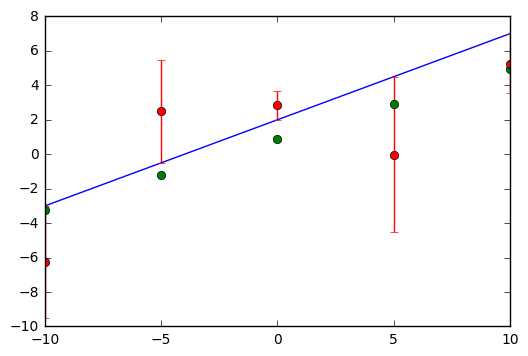

In [61]:
pl.plot(x_model, y_model, '-')
pl.plot(x, lres.predict(sm.add_constant(x)), 'o')
pl.errorbar(x,y,yerr=e,fmt='o')

Weighted Least Square Method - check it out !!

In [46]:
# sm.WLS?
# dir(sm)

In [47]:
e

array([-3.25689181,  2.99203634,  0.84893549, -4.51888414, -1.73580076])

In [48]:
wres = sm.WLS(y, sm.add_constant(x), weights=np.abs(1.0/e)).fit()
#np.abs = absolute value
#weights default is always 1

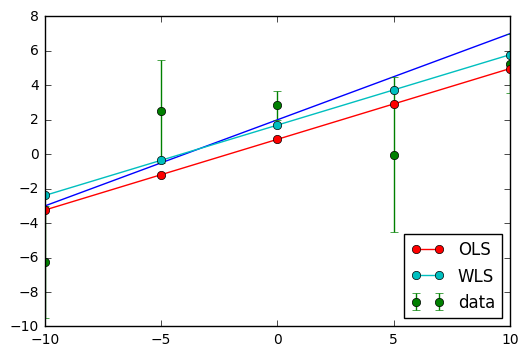

In [49]:
pl.plot(x_model, y_model, '-')
pl.errorbar(x,y,yerr=e, fmt='o', label = 'data')
pl.plot(x, lres.predict(sm.add_constant(x)), '-o', label = 'OLS')
pl.plot(x, wres.predict(sm.add_constant(x)), '-o', label = 'WLS')
leg = pl.legend(loc = 4)

In [50]:
import statsmodels.formula.api as smf
import pandas as pd

In [51]:
dataDF = pd.DataFrame()

In [52]:
dataDF['x'] = x
dataDF['y'] = y
dataDF

,x,y
0,-10.0,-6.256892
1,-5.0,2.492036
2,0.0,2.848935
3,5.0,-0.018884
4,10.0,5.264199


In [53]:
fres = smf.ols(formula = 'y ~ x', data = dataDF).fit()
fres.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3.584
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.155
Time:                        11:18:45   Log-Likelihood:                -11.980
No. Observations:                   5   AIC:                             27.96
Df Residuals:                       3   BIC:                             27.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8659      1.534      0.565      0.612        -4.015     5.747
x              0.4106      0.217      1.893      0.155        -0.280     1.101
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.334
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.516
Skew:                           0.051   Prob(JB):                        0.773
Kurtosis:                       1.430   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DO THE PLOTTING HERE

In [54]:
dataDF['x'] = x
dataDF['x2'] = x**2
dataDF['y'] = y
dataDF

,x,y,x2
0,-10.0,-6.256892,100.0
1,-5.0,2.492036,25.0
2,0.0,2.848935,0.0
3,5.0,-0.018884,25.0
4,10.0,5.264199,100.0


In [56]:
fres2 = smf.ols(formula = 'y ~ x2 + x', data = dataDF).fit()
fres2.summary()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     1.774
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.361
Time:                        11:22:02   Log-Likelihood:                -11.394
No. Observations:                   5   AIC:                             28.79
Df Residuals:                       2   BIC:                             27.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3168      2.604      0.890      0.467        -8.887    13.520
x2            -0.0290      0.040     -0.727      0.543        -0.201     0.143
x              0.4106      0.236      1.738      0.224        -0.606     1.427
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.619
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.421
Skew:                          -0.330   Prob(JB):                        0.810
Kurtosis:                       1.742   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DO THE PLOTTING HERE AGAIN 